In [ ]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

In [3]:
import pandas as pd
path = "/Users/KumarSanjeev/Downloads/nips-papers/papers.csv"
data = pd.read_csv(path)

In [12]:
data.tail(2000)

,id,year,title,event_type,pdf_name,abstract,paper_text
5241,5745,2015,Distributionally Robust Logistic Regression,Spotlight,5745-distributionally-robust-logistic-regressi...,This paper proposes a distributionally robust ...,Distributionally Robust Logistic Regression\n\...
5242,5746,2015,On some provably correct cases of variational ...,Spotlight,5746-on-some-provably-correct-cases-of-variati...,"Variational inference is an efficient, popular...",On some provably correct cases of variational\...
5243,5747,2015,Extending Gossip Algorithms to Distributed Est...,Spotlight,5747-extending-gossip-algorithms-to-distribute...,Efficient and robust algorithms for decentrali...,Extending Gossip Algorithms to\nDistributed Es...
5244,5748,2015,The Self-Normalized Estimator for Counterfactu...,Spotlight,5748-the-self-normalized-estimator-for-counter...,This paper identifies a severe problem of the ...,The Self-Normalized Estimator for Counterfactu...
5245,5749,2015,Frank-Wolfe Bayesian Quadrature: Probabilistic...,Spotlight,5749-frank-wolfe-bayesian-quadrature-probabili...,There is renewed interest in formulating integ...,Frank-Wolfe Bayesian Quadrature: Probabilistic...
...,...,...,...,...,...,...,...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...


In [8]:
data.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

In [15]:
data['word_count'] = data['abstract'].apply(lambda x: len(str(x).split(" ")))

In [17]:
data["word_count"].head()

0    2
1    2
2    2
3    2
4    2
Name: word_count, dtype: int64

In [19]:
data[["abstract","word_count"]].head()

,abstract,word_count
0,Abstract Missing,2
1,Abstract Missing,2
2,Abstract Missing,2
3,Abstract Missing,2
4,Abstract Missing,2


In [24]:
data.word_count.describe()

count    7241.000000
mean       81.331308
std        80.297257
min         2.000000
25%         2.000000
50%        89.000000
75%       148.000000
max       317.000000
Name: word_count, dtype: float64

In [25]:
data.shape

(7241, 8)

In [27]:
#Identify common words
freq = pd.Series(' '.join(data['abstract']).split()).value_counts()[:20]
freq

the         29793
of          20918
a           16339
and         13626
to          12869
in           8980
that         7838
is           7666
for          7169
We           6238
on           5579
we           5167
with         4512
this         3677
as           3643
are          3529
an           3366
Abstract     3323
Missing      3318
by           3197
dtype: int64

In [42]:
#Identify common words

freq1 = pd.Series(' '.join(data['abstract']).split()).value_counts()[-20:]
freq1    

solver-based             1
evasion.                 1
mean/mode                1
365x                     1
wavelet.                 1
(billion                 1
maximum-flow             1
(DP),                    1
similarities)            1
security's               1
representativeness,      1
Mozer,                   1
l)                       1
(depending               1
wants,                   1
training?                1
founded,                 1
(characteristic)         1
$\MO$($n^2$)             1
approximate-inference    1
dtype: int64

In [48]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
word = "inversely"
stemmer.stem(word)

'invers'

In [49]:
lemmatizer.lemmatize(word)

'inversely'

In [52]:
stop_words= set(stopwords.words("english"))

In [59]:
import re
corpus = []
for i in range(0, 3847):
   text = re.sub('[^a-zA-Z]', ' ', data['abstract'][i])
   text = text.lower()
   text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text) 
   text=re.sub("(\\d|\\W)+"," ",text)
   text=text.split() 
   ps=PorterStemmer()
    #Lemmatisation
   lem = WordNetLemmatizer()
   text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
   text = " ".join(text)
   corpus.append(text)
print(corpus)

['abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing', 'abstract missing',

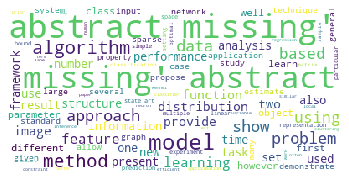

In [68]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
X=cv.fit_transform(corpus)
X

<3847x7036 sparse matrix of type '<class 'numpy.int64'>'
	with 80469 stored elements in Compressed Sparse Row format>

In [80]:
list(cv.vocabulary_.keys())[:10]
a = cv.fit_transform(corpus)
a

<3847x7036 sparse matrix of type '<class 'numpy.int64'>'
	with 80469 stored elements in Compressed Sparse Row format>

# UniGrams

[Text(0, 0, 'missing'),
 Text(0, 0, 'abstract'),
 Text(0, 0, 'model'),
 Text(0, 0, 'algorithm'),
 Text(0, 0, 'learning'),
 Text(0, 0, 'method'),
 Text(0, 0, 'problem'),
 Text(0, 0, 'data'),
 Text(0, 0, 'show'),
 Text(0, 0, 'approach'),
 Text(0, 0, 'based'),
 Text(0, 0, 'function'),
 Text(0, 0, 'result'),
 Text(0, 0, 'using'),
 Text(0, 0, 'feature'),
 Text(0, 0, 'image'),
 Text(0, 0, 'paper'),
 Text(0, 0, 'set'),
 Text(0, 0, 'distribution'),
 Text(0, 0, 'task')]

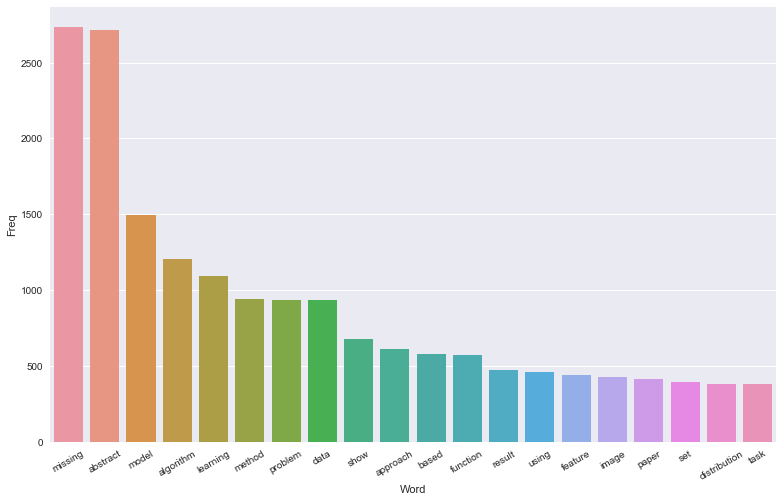

In [83]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

#  Bi- grams

                   Bi-gram  Freq
0         abstract missing  2694
1                state art   145
2       learning algorithm   111
3         high dimensional    96
4                 data set    89
5         machine learning    89
6               real world    87
7      experimental result    86
8          graphical model    72
9     optimization problem    70
10           loss function    69
11  reinforcement learning    63
12           paper propose    60
13        learning problem    59
14        gaussian process    56
15             large scale    55
16         semi supervised    54
17         active learning    52
18         online learning    50
19           paper present    49


[Text(0, 0, 'abstract missing'),
 Text(0, 0, 'state art'),
 Text(0, 0, 'learning algorithm'),
 Text(0, 0, 'high dimensional'),
 Text(0, 0, 'data set'),
 Text(0, 0, 'machine learning'),
 Text(0, 0, 'real world'),
 Text(0, 0, 'experimental result'),
 Text(0, 0, 'graphical model'),
 Text(0, 0, 'optimization problem'),
 Text(0, 0, 'loss function'),
 Text(0, 0, 'reinforcement learning'),
 Text(0, 0, 'paper propose'),
 Text(0, 0, 'learning problem'),
 Text(0, 0, 'gaussian process'),
 Text(0, 0, 'large scale'),
 Text(0, 0, 'semi supervised'),
 Text(0, 0, 'active learning'),
 Text(0, 0, 'online learning'),
 Text(0, 0, 'paper present')]

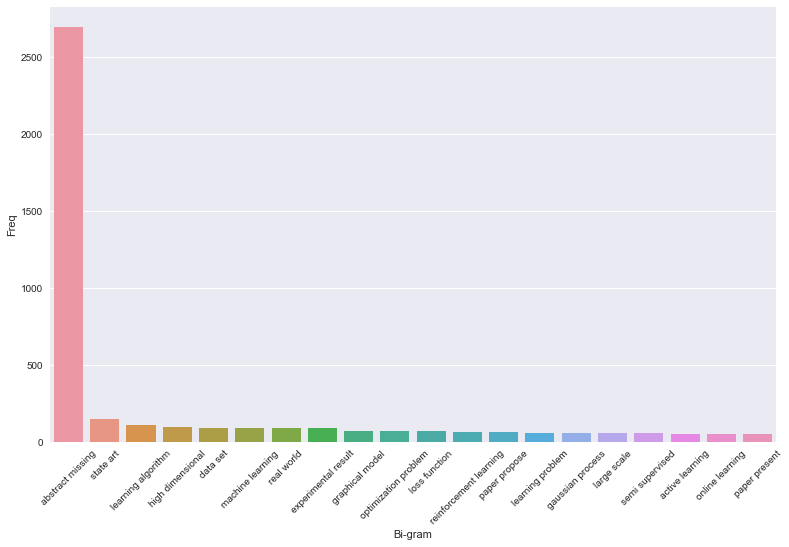

In [85]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=3000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

# Tri grams  

                        Tri-gram  Freq
0         support vector machine    32
1       multiple kernel learning    27
2       semi supervised learning    25
3        markov decision process    21
4       experimental result show    21
5   principal component analysis    19
6             markov chain monte    19
7              chain monte carlo    19
8            real world datasets    18
9            markov random field    18
10   convex optimization problem    18
11              state art method    18
12               real world data    17
13         latent variable model    16
14         high dimensional data    16
15   latent dirichlet allocation    15
16         state art performance    15
17       least square regression    15
18   empirical risk minimization    14
19   stochastic gradient descent    14


[Text(0, 0, 'support vector machine'),
 Text(0, 0, 'multiple kernel learning'),
 Text(0, 0, 'semi supervised learning'),
 Text(0, 0, 'markov decision process'),
 Text(0, 0, 'experimental result show'),
 Text(0, 0, 'principal component analysis'),
 Text(0, 0, 'markov chain monte'),
 Text(0, 0, 'chain monte carlo'),
 Text(0, 0, 'real world datasets'),
 Text(0, 0, 'markov random field'),
 Text(0, 0, 'convex optimization problem'),
 Text(0, 0, 'state art method'),
 Text(0, 0, 'real world data'),
 Text(0, 0, 'latent variable model'),
 Text(0, 0, 'high dimensional data'),
 Text(0, 0, 'latent dirichlet allocation'),
 Text(0, 0, 'state art performance'),
 Text(0, 0, 'least square regression'),
 Text(0, 0, 'empirical risk minimization'),
 Text(0, 0, 'stochastic gradient descent')]

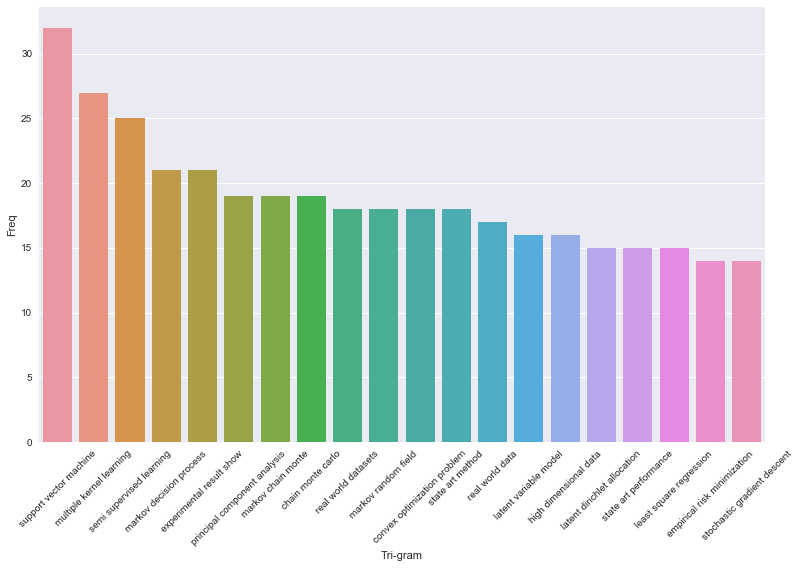

In [89]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  
            max_features=3000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [106]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer()
tfidf_transformer.fit_transform(X)
# get feature names
feature_names=cv.get_feature_names()
# feature_names 
# # fetch document for which keywords needs to be extracted
doc=corpus[532]
# doc 
# # #generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.fit_transform(cv.transform([doc]))

In [96]:
tf_idf_vector

<1x7036 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [107]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
abstract missing

Keywords:
missing 0.707
abstract 0.707
